In [ ]:
# install.packages("Seurat")
# install.packages("tidyverse")
# install.packages("ggplot2")
# install.packages("usethis")
# install.packages("devtools")
# install.packages("hdf5r")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘dotCall64’, ‘gtools’, ‘caTools’, ‘plyr’, ‘tensor’, ‘BH’, ‘sitmo’, ‘sp’, ‘spam’, ‘globals’, ‘listenv’, ‘parallelly’, ‘zoo’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’, ‘RcppTOML’, ‘here’, ‘gplots’, ‘reshape2’, ‘gridExtra’, ‘RcppArmadillo’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘spatstat.data’, ‘spatstat.random’, ‘spatstat.utils’, ‘spatstat.sparse’, ‘goftest’, ‘abind’, ‘deldir’, ‘polyclip’, ‘FNN’, ‘dqrng’, ‘SeuratObject’, ‘cowplot’, ‘fastDummies’, ‘fitdistrplus’, ‘future’, ‘future.apply’, ‘ggrepel’, ‘ggridges’, ‘ica’, ‘igraph’, ‘irlba’, ‘leiden’, ‘lmtest’, ‘matrixStats’, ‘miniUI’, ‘patchwork’, ‘pbapply’, ‘plotly’, ‘png’, ‘progressr’, ‘RANN’, ‘Rcpp’, ‘RcppAnnoy’, ‘RcppHNSW’, ‘reticulate’, ‘ROCR’, ‘RSpectra’, ‘Rtsne’, ‘scattermore’, ‘sctransform’, ‘shiny’, ‘spatstat.explore’, ‘spatstat.geom’, ‘uwot’, ‘RcppEigen’, ‘RcppProgress’


Installing package in

In [ ]:
devtools::install_github("chris-mcginnis-ucsf/DoubletFinder")

maps   (NA -> 3.4.2) [CRAN]
fields (NA -> 15.2 ) [CRAN]


Installing 2 packages: maps, fields

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpAEe12l/remotes18413ea43703/chris-mcginnis-ucsf-DoubletFinder-03e9f37/DESCRIPTION’ ... OK
* preparing ‘DoubletFinder’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘DoubletFinder_2.0.4.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyverse)
library(Seurat)
library(ggplot2)
library(DoubletFinder)
library(hdf5r)

In [ ]:
list.files()

[1] "20k_NSCLC_DTC_3p_nextgem_Multiplex_count_raw_feature_bc_matrix.h5"
[2] "sample_data"

In [ ]:
nsclc.sparse.m <- Read10X_h5("/content/20k_NSCLC_DTC_3p_nextgem_Multiplex_count_raw_feature_bc_matrix.h5", use.names = TRUE, unique.features = TRUE)

Genome matrix has multiple modalities, returning a list of matrices for this genome



In [ ]:
str(nsclc.sparse.m)

List of 3
 $ Gene Expression     :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. ..@ i       : int [1:75593104] 184 7502 9727 10485 13480 21902 24894 25667 28658 31547 ...
  .. ..@ p       : int [1:3862364] 0 0 0 12 14 14 21 21 25 25 ...
  .. ..@ Dim     : int [1:2] 36601 3862363
  .. ..@ Dimnames:List of 2
  .. .. ..$ : chr [1:36601] "MIR1302-2HG" "FAM138A" "OR4F5" "AL627309.1" ...
  .. .. ..$ : chr [1:3862363] "AAACCCAAGAAACACT-1" "AAACCCAAGAAACCAT-1" "AAACCCAAGAAACCCA-1" "AAACCCAAGAAACCCG-1" ...
  .. ..@ x       : num [1:75593104] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..@ factors : list()
 $ Antibody Capture    :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. ..@ i       : int [1:1159120] 8 4 3 1 1 0 3 0 3 1 ...
  .. ..@ p       : int [1:3862364] 0 0 0 0 0 0 1 1 1 2 ...
  .. ..@ Dim     : int [1:2] 9 3862363
  .. ..@ Dimnames:List of 2
  .. .. ..$ : chr [1:9] "CD3" "CD4.1" "CD8" "CD11c" ...
  .. .. ..$ : chr [1:3862363] "AAACCCAAGAAACACT-1" "AAACCCAAGAAACCAT-1" "

In [ ]:
cts <- nsclc.sparse.m[[1]]
cts[1:10, 1:10]


  [[ suppressing 10 column names ‘AAACCCAAGAAACACT-1’, ‘AAACCCAAGAAACCAT-1’, ‘AAACCCAAGAAACCCA-1’ ... ]]



10 x 10 sparse Matrix of class "dgCMatrix"
                               
MIR1302-2HG . . . . . . . . . .
FAM138A     . . . . . . . . . .
OR4F5       . . . . . . . . . .
AL627309.1  . . . . . . . . . .
AL627309.3  . . . . . . . . . .
AL627309.2  . . . . . . . . . .
AL627309.5  . . . . . . . . . .
AL627309.4  . . . . . . . . . .
AP006222.2  . . . . . . . . . .
AL732372.1  . . . . . . . . . .

In [ ]:
nsclc.seurat.obj <- CreateSeuratObject(counts = cts, project = "NSCLC", min.cells = 3, min.features = 200)

In [ ]:
str(nsclc.seurat.obj)

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay5' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ layers    :List of 1
  .. .. .. .. ..$ counts:Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. .. ..@ i       : int [1:63710619] 59 64 76 77 89 98 142 204 270 312 ...
  .. .. .. .. .. .. ..@ p       : int [1:42082] 0 789 1040 1401 1649 1950 8346 12231 12456 12884 ...
  .. .. .. .. .. .. ..@ Dim     : int [1:2] 29552 42081
  .. .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. ..@ x       : num [1:63710619] 1 2 1 2 1 1 1 1 1 1 ...
  .. .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ cells     :Formal class 'LogMap' [package "SeuratObject"] with 1 slot
  .. .. .. .. .. ..@ .Data: logi [1:42081, 1] TRUE TRUE TRUE TRUE TRUE TRUE ...
  .. .. .. .. .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. .. .. .. .. ..$ 

In [ ]:
nsclc.seurat.obj$mito.percent <- PercentageFeatureSet(object = nsclc.seurat.obj, pattern = "^MT-")
nsclc.seurat.obj@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,mito.percent
,<fct>,<dbl>,<int>,<dbl>
AAACCCAAGAATTTGG-1,NSCLC,1333,789,11.102776
AAACCCAAGAGATTCA-1,NSCLC,295,251,4.406780
AAACCCAAGATTGACA-1,NSCLC,470,361,2.127660
AAACCCAAGCAAATCA-1,NSCLC,296,248,2.364865
AAACCCAAGCAATTCC-1,NSCLC,364,301,2.472527
AAACCCAAGCACTGGA-1,NSCLC,40874,6396,5.766502
AAACCCAAGCATGGGT-1,NSCLC,13137,3885,2.542437
AAACCCAAGCCGTTGC-1,NSCLC,260,225,1.923077
AAACCCAAGCCTCCAG-1,NSCLC,4110,428,7.858881


Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”
`geom_smooth()` using formula = 'y ~ x'


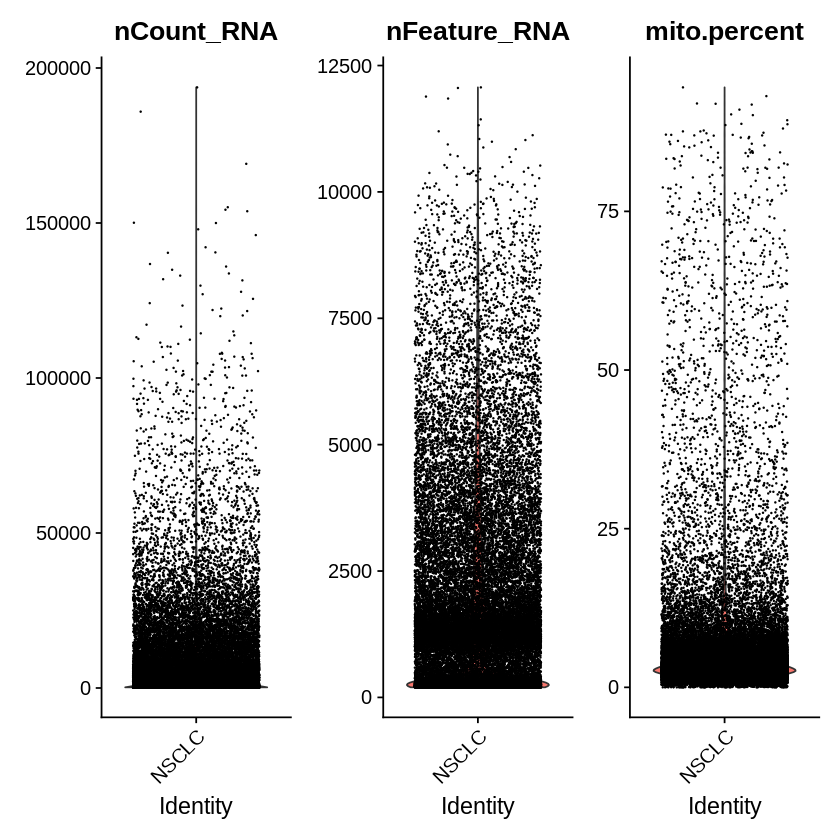

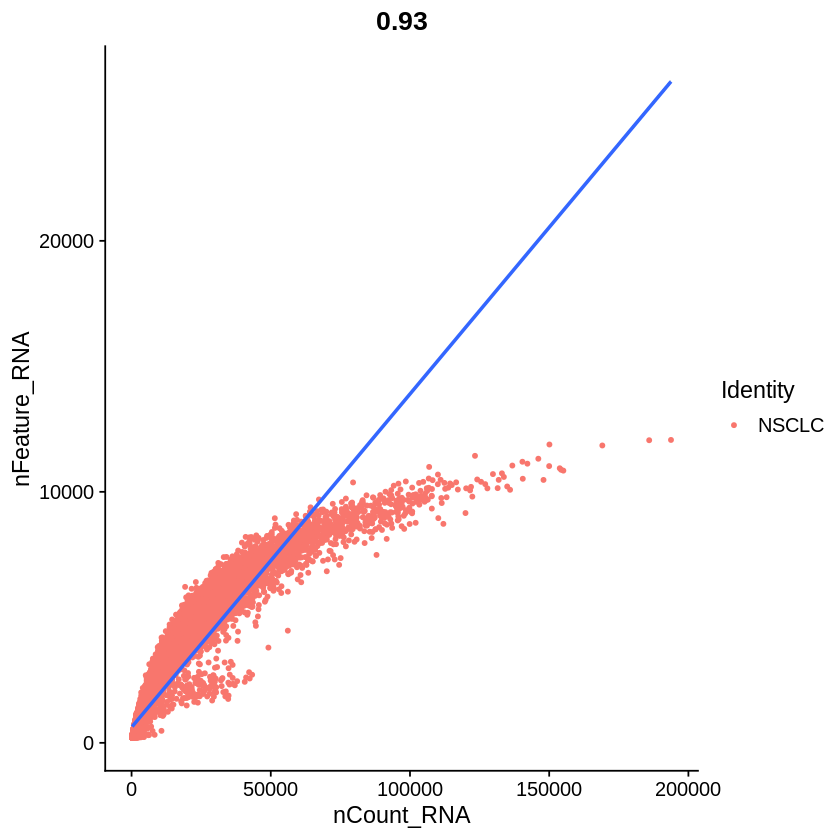

In [ ]:
VlnPlot(nsclc.seurat.obj, features = c("nCount_RNA", "nFeature_RNA", "mito.percent"))
FeatureScatter(nsclc.seurat.obj, feature1 = "nCount_RNA", feature2 = "nFeature_RNA") + geom_smooth(method = 'lm')

In [ ]:
nsclc.seurat.obj <- subset(nsclc.seurat.obj, subset = nFeature_RNA > 200 & nFeature_RNA < 2500 & mito.percent < 5)
nsclc.seurat.obj <- NormalizeData(nsclc.seurat.obj)
nsclc.seurat.obj <- FindVariableFeatures(nsclc.seurat.obj, selection.method = "vst", features = 2000)
str(nsclc.seurat.obj)



Normalizing layer: counts

Finding variable features for layer counts



Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay5' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ layers    :List of 2
  .. .. .. .. ..$ counts:Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. .. ..@ i       : int [1:15577418] 142 207 566 625 659 961 1016 1164 1183 1204 ...
  .. .. .. .. .. .. ..@ p       : int [1:24709] 0 251 612 860 1161 1386 1601 1838 2105 2397 ...
  .. .. .. .. .. .. ..@ Dim     : int [1:2] 29552 24708
  .. .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. ..@ x       : num [1:15577418] 1 1 1 1 1 1 2 1 1 1 ...
  .. .. .. .. .. .. ..@ factors : list()
  .. .. .. .. ..$ data  :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. .. ..@ i       : int [1:15577418] 142 207 566 625 659 961 1016 1164 1183 1204 ...
  .. .. .. .. .. .. ..@ p       : int [1:24709] 0 251 612 86

In [ ]:
nsclc.seurat.obj <- ScaleData(nsclc.seurat.obj, features = rownames(nsclc.seurat.obj))
str(nsclc.seurat.obj)

Centering and scaling data matrix



Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay5' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ layers    :List of 3
  .. .. .. .. ..$ counts    :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. .. ..@ i       : int [1:15577418] 142 207 566 625 659 961 1016 1164 1183 1204 ...
  .. .. .. .. .. .. ..@ p       : int [1:24709] 0 251 612 860 1161 1386 1601 1838 2105 2397 ...
  .. .. .. .. .. .. ..@ Dim     : int [1:2] 29552 24708
  .. .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. ..@ x       : num [1:15577418] 1 1 1 1 1 1 2 1 1 1 ...
  .. .. .. .. .. .. ..@ factors : list()
  .. .. .. .. ..$ data      :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. .. ..@ i       : int [1:15577418] 142 207 566 625 659 961 1016 1164 1183 1204 ...
  .. .. .. .. .. .. ..@ p       : int [1:24709] 0 25

In [ ]:
nsclc.seurat.obj <- RunPCA(nsclc.seurat.obj, features = VariableFeatures(nsclc.seurat.obj))

PC_ 1 
Positive:  MTRNR2L12, CD69, CREM, LTB, CD7, IL32, CCL5, TXNIP, S100A4, DUSP2 
	   CLEC2B, IL7R, ZNF331, TUBA4A, DUSP4, ITM2A, RORA, TRBC1, BCAS2, NKG7 
	   PIK3R1, PMAIP1, RGCC, GZMA, TIGIT, CYTOR, GPR65, CEMIP2, NR4A2, CD27 
Negative:  FTL, SPP1, APOE, CXCL8, IGHA1, IGLC2, COL3A1, KRT19, COL1A2, CXCL1 
	   SFTPB, SFTPC, WFDC2, COL1A1, ELF3, SCGB3A1, APOC1, KRT18, LYZ, MDK 
	   TCIM, IGHG4, SCGB3A2, IFI27, TM4SF1, TFF3, CXCL2, TACSTD2, SPARC, MGST1 
PC_ 2 
Positive:  FCN1, AIF1, CD68, AC020656.1, S100A8, S100A9, TYROBP, FCER1G, C5AR1, IFI30 
	   SMIM25, FTL, CD14, TREM1, CYBB, PLAUR, CST3, NCF2, FCGR2A, EREG 
	   VCAN, CTSS, OLR1, CLEC4E, IL1RN, SPI1, LST1, PLEK, FPR1, PHACTR1 
Negative:  IL32, CD7, CCL5, TRBC1, ITM2A, GZMA, RORA, IL7R, NKG7, TIGIT 
	   TUBA4A, KLRK1, CTSW, CD69, IFNG, TRAT1, ICOS, CD8A, GPR171, GZMH 
	   SH2D1A, GZMK, KLRD1, GIMAP7, BATF, CD8B, AC243960.1, LINC02446, TRGC2, TNFRSF18 
PC_ 3 
Positive:  MS4A1, BANK1, CD79A, VPREB3, TNFRSF13C, MEF2C, LY9, TNFRSF13

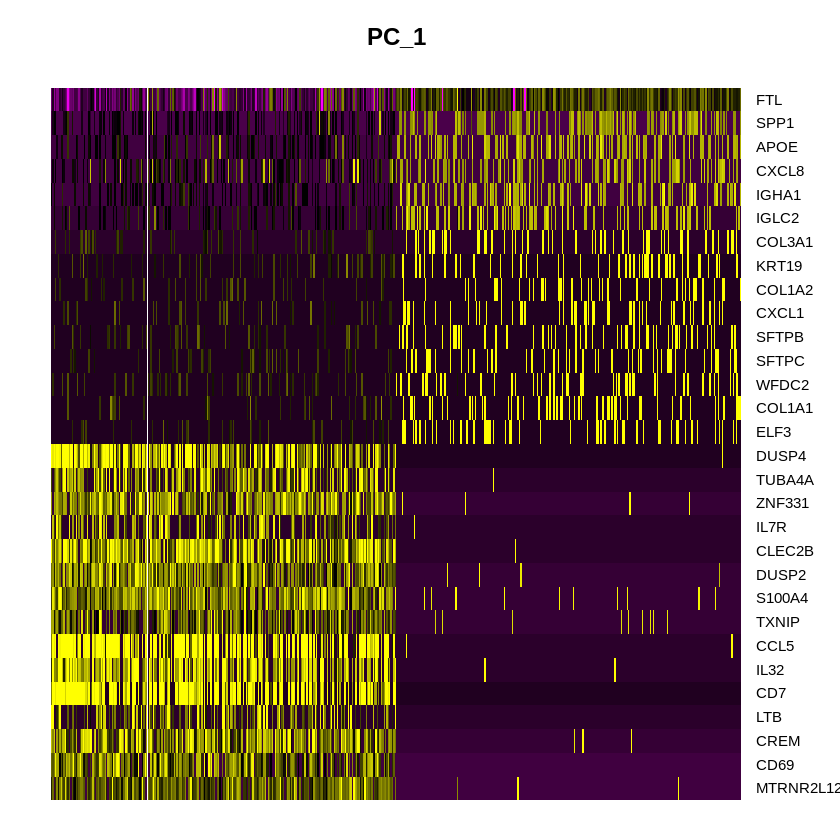

In [ ]:
DimHeatmap(nsclc.seurat.obj, dims = 1, cells = 500, balanced = TRUE)

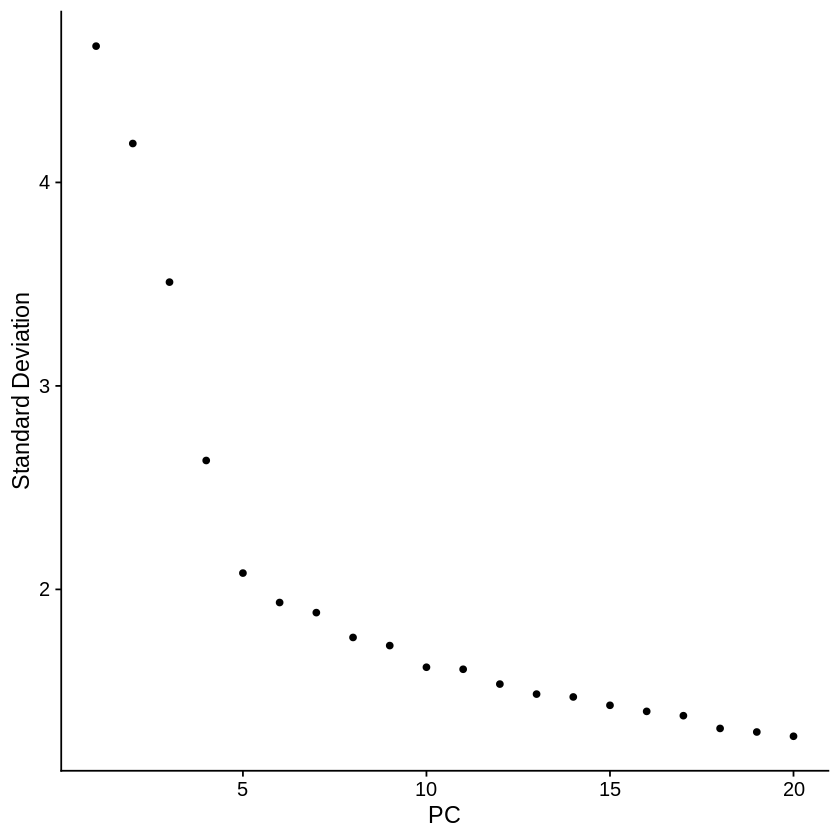

In [ ]:
ElbowPlot(nsclc.seurat.obj)

In [ ]:
nsclc.seurat.obj <- FindNeighbors(nsclc.seurat.obj, dims = 1:15)
nsclc.seurat.obj <- FindClusters(nsclc.seurat.obj, resolution = c(0.1, 0.3, 0.5, 0.7, 1))

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 24708
Number of edges: 611792

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9643
Number of communities: 8
Elapsed time: 3 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 24708
Number of edges: 611792

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9042
Number of communities: 11
Elapsed time: 4 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 24708
Number of edges: 611792

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8516
Number of communities: 14
Elapsed time: 4 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 24708
Number of edges: 611792

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8206
Number of communities: 15
Elapsed time: 6 seconds
Modularity Op

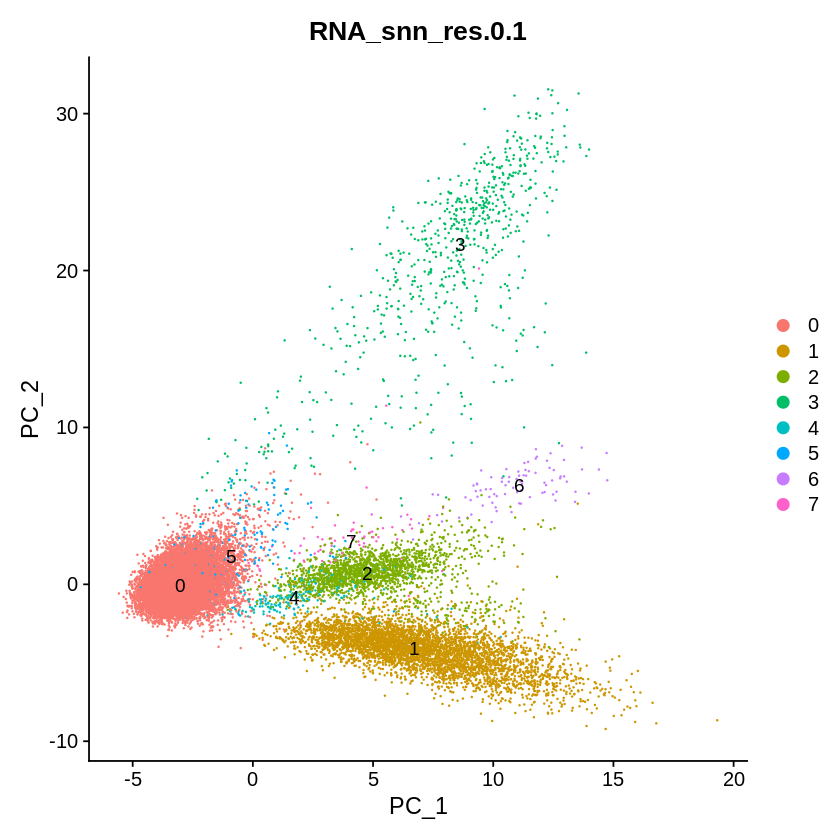

In [ ]:
DimPlot(nsclc.seurat.obj, group.by = "RNA_snn_res.0.1", label = TRUE)

In [ ]:
nsclc.seurat.obj <- RunUMAP(nsclc.seurat.obj, dims = 1:20)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
01:00:00 UMAP embedding parameters a = 0.9922 b = 1.112

01:00:00 Read 24708 rows and found 20 numeric columns

01:00:00 Using Annoy for neighbor search, n_neighbors = 30

01:00:00 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

01:00:04 Writing NN index file to temp file /tmp/RtmpAEe12l/file184146274a4

01:00:04 Searching Annoy index using 1 thread, search_k = 3000

01:00:15 Annoy recall = 100%

01:00:16 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors =

In [ ]:
sweep.res.list_nsclc <- paramSweep(nsclc.seurat.obj, PCs = 1:20, sct = FALSE)

[1] "Creating artificial doublets for pN = 5%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 5e-04..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 10%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 5e-04..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 15%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 5e-04..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 20%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 5e-04..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 25%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 5e-04..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 30%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 5e-04..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."


In [ ]:
sweep.stats_nsclc <- summarizeSweep(sweep.res.list_nsclc, GT = FALSE)

NULL


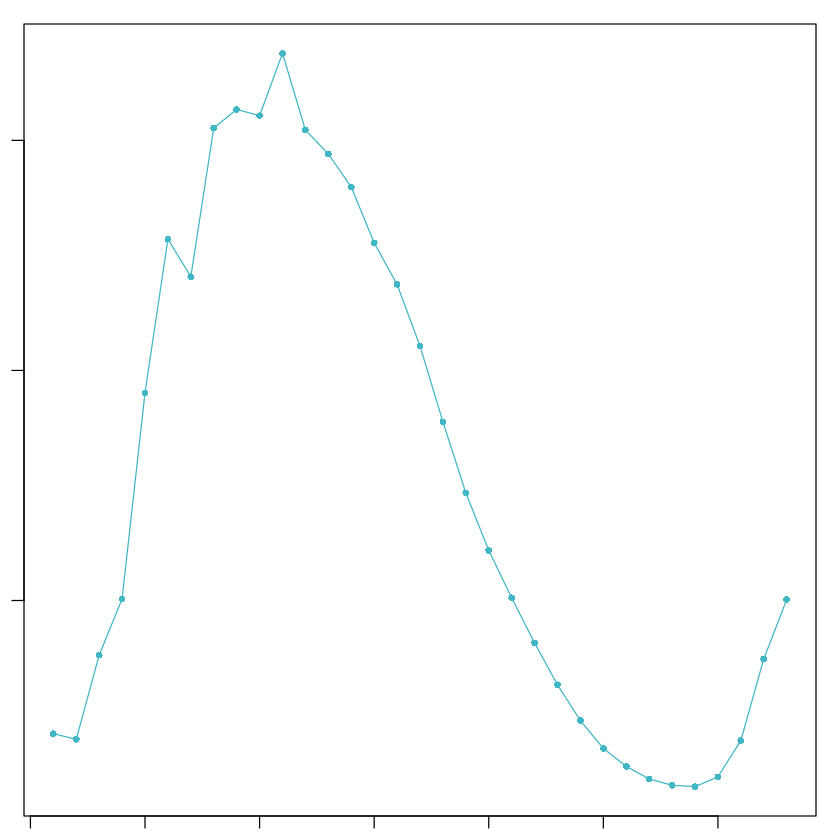

In [ ]:
bcmvn_nsclc <- find.pK(sweep.stats_nsclc)

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


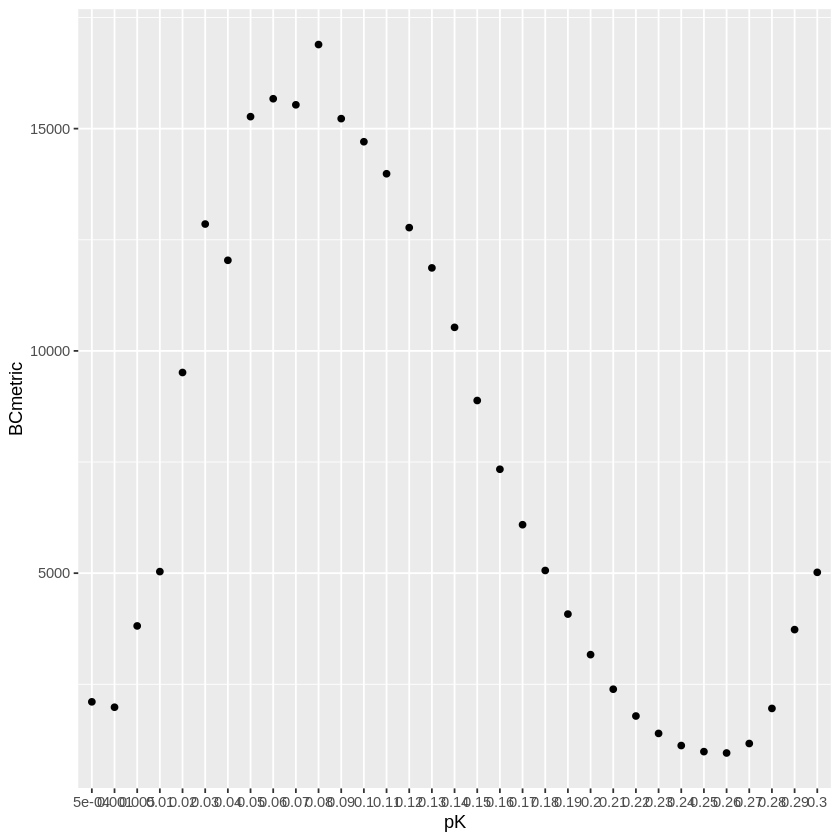

In [ ]:
ggplot(bcmvn_nsclc, aes(x = pK, y = BCmetric), group = 1) +
  geom_point() +
    geom_line()

#pk = 0.08

In [ ]:
pK <- bcmvn_nsclc %>%
  filter(BCmetric == max(BCmetric))

pK <- select(pK, pK)

pK <- as.numeric(as.character(pK[[1]]))

In [ ]:
pK

[1] 0.08

In [ ]:
annotations <- nsclc.seurat.obj@meta.data$seurat_clusters
homotypic.prop <- modelHomotypic(annotations)

nExp_poi <- round(0.076*nrow(nsclc.seurat.obj@meta.data))
nExp_poi.adj <- round(nExp_poi*(1-homotypic.prop))

In [ ]:
nsclc.seurat.obj <- doubletFinder(nsclc.seurat.obj, PCs = 1:20, pN = 0.25, pK = pK, nExp = nExp_poi.adj, reuse.pANN = FALSE, sct = FALSE)


[1] "Creating 8236 artificial doublets..."
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."


Normalizing layer: counts



[1] "Finding variable genes..."


Finding variable features for layer counts



[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Computing pANN..."
[1] "Classifying doublets.."


In [ ]:
names(nsclc.seurat.obj@meta.data)

[1] "orig.ident"                        "nCount_RNA"                       
 [3] "nFeature_RNA"                      "mito.percent"                     
 [5] "RNA_snn_res.0.1"                   "RNA_snn_res.0.3"                  
 [7] "RNA_snn_res.0.5"                   "RNA_snn_res.0.7"                  
 [9] "RNA_snn_res.1"                     "seurat_clusters"                  
[11] "pANN_0.25_0.08_1642"               "DF.classifications_0.25_0.08_1642"

In [ ]:
str(nsclc.seurat.obj)

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay5' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ layers    :List of 3
  .. .. .. .. ..$ counts    :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. .. ..@ i       : int [1:15577418] 142 207 566 625 659 961 1016 1164 1183 1204 ...
  .. .. .. .. .. .. ..@ p       : int [1:24709] 0 251 612 860 1161 1386 1601 1838 2105 2397 ...
  .. .. .. .. .. .. ..@ Dim     : int [1:2] 29552 24708
  .. .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. ..@ x       : num [1:15577418] 1 1 1 1 1 1 2 1 1 1 ...
  .. .. .. .. .. .. ..@ factors : list()
  .. .. .. .. ..$ data      :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. .. ..@ i       : int [1:15577418] 142 207 566 625 659 961 1016 1164 1183 1204 ...
  .. .. .. .. .. .. ..@ p       : int [1:24709] 0 25

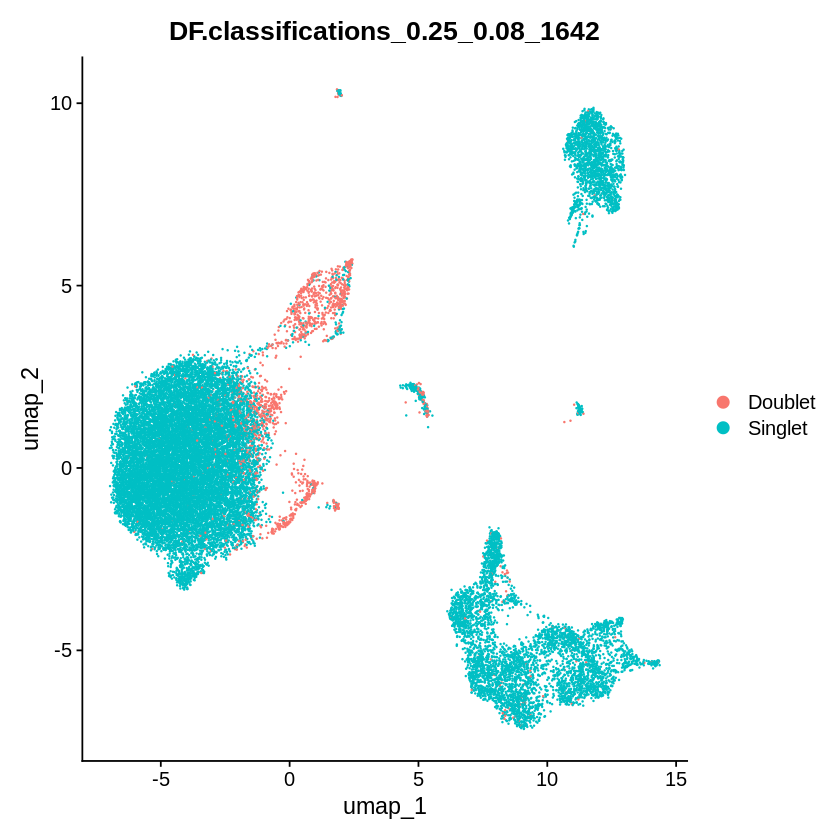

In [ ]:
DimPlot(nsclc.seurat.obj, reduction = 'umap', group.by = "DF.classifications_0.25_0.08_1642")

In [ ]:
nsclc.seurat.obj@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,mito.percent,RNA_snn_res.0.1,RNA_snn_res.0.3,RNA_snn_res.0.5,RNA_snn_res.0.7,RNA_snn_res.1,seurat_clusters,pANN_0.25_0.08_1642,DF.classifications_0.25_0.08_1642
,<fct>,<dbl>,<int>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<chr>
AAACCCAAGAGATTCA-1,NSCLC,295,251,4.4067797,0,0,0,0,0,0,0.0000000000,Singlet
AAACCCAAGATTGACA-1,NSCLC,470,361,2.1276596,0,0,1,7,9,9,0.3691198786,Singlet
AAACCCAAGCAAATCA-1,NSCLC,296,248,2.3648649,0,0,0,0,0,0,0.0003793627,Singlet
AAACCCAAGCAATTCC-1,NSCLC,364,301,2.4725275,0,0,1,1,2,2,0.0060698027,Singlet
AAACCCAAGCCGTTGC-1,NSCLC,260,225,1.9230769,0,0,0,0,2,2,0.0000000000,Singlet
AAACCCAAGCCTCTCT-1,NSCLC,263,215,1.5209125,0,0,0,1,1,1,0.0000000000,Singlet
AAACCCAAGCGGTAAC-1,NSCLC,274,237,2.9197080,0,0,0,0,0,0,0.0003793627,Singlet
AAACCCAAGGCTCCCA-1,NSCLC,325,267,2.1538462,0,0,1,1,1,1,0.0000000000,Singlet
AAACCCAAGGTCACTT-1,NSCLC,344,292,2.3255814,0,0,1,1,1,1,0.0003793627,Singlet


In [ ]:
nsclc.seurat.obj.dblt.adj <- subset(nsclc.seurat.obj, subset = DF.classifications_0.25_0.08_1642 == "Singlet")

In [ ]:
table(nsclc.seurat.obj.dblt.adj@meta.data$DF.classifications_0.25_0.08_1642)


Singlet 
  23066 